In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.colors as colors

In [3]:
# Order of all possible bins for plotting
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]',
         '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]',
         '(100, 150]', '(150, 200]', '(200, 500]', '(500, 1000]']

### Get data

In [1]:
# # Make nodes dataframe
# d = []
# for file in nodes_d:
#     data = pd.read_csv(os.path.join(data_path, file))
#     d.append(data)
# nodes_desc = pd.concat(d, axis=0, ignore_index=True)#.rename(columns={'Unnamed: 0': 'stat'})

In [ ]:
nodes_w_zero = nodes_desc[nodes_desc['with_zero'] == 1]

In [ ]:
node_w_zero_mean = nodes_w_zero.groupby('Bin')[['mean','std']].mean()

In [ ]:
node_w_zero_mean = node_w_zero_mean.reset_index()

In [ ]:
node_w_zero_mean['mean'] = node_w_zero_mean['mean']*100

In [ ]:
node_w_zero_mean['std'] = node_w_zero_mean['std']*100

In [ ]:
node_w_zero_mean

In [ ]:
# node_w_zero_med = nodes_w_zero.groupby('Bin')[['50%', 'std']].mean()

In [ ]:
# node_w_zero_med = node_w_zero_mean.reset_index()

In [ ]:
# node_w_zero_med['50%'] = node_w_zero_med['50%']*100

In [ ]:
# node_w_zero_med['std'] = node_w_zero_med['std']*100

In [ ]:
# node_w_zero_med

### Reaches

#### Centiles

In [ ]:
# def read_in_centiles

In [4]:
data_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_01_2025_02_04_max'

In [5]:
reaches_c = []

for file in os.listdir(data_path):
    if not file.startswith('.'):
        reaches_c.append(file)

In [6]:
# Make reaches dataframe
d = []

for file in reaches_c:
    data = pd.read_parquet(os.path.join(data_path, file))
    d.append(data)
    
reaches = pd.concat(d, axis=0, ignore_index=True)#.rename(columns={'Unnamed: 0': 'stat'})

In [ ]:
def get_order(reaches, order):
    # Make sorted list of bins present
    ordered = []
    reach_bins = list(set(reaches.Bin.to_list()))

    for i in order:
        if i in reach_bins:
            ordered.append(i)
            
    return ordered

In [7]:
# Make sorted list of bins present
ordered = []
reach_bins = list(set(reaches.Bin.to_list()))

for i in order:
    if i in reach_bins:
        ordered.append(i)
# ordered

In [ ]:
reaches

,Bin,quantile,coverage,threshold
0,"(0, 10]",0.00,0.0,0.1
1,"(0, 10]",0.01,0.0,0.1
2,"(0, 10]",0.02,0.0,0.1
3,"(0, 10]",0.03,0.0,0.1
4,"(0, 10]",0.04,0.0,0.1
...,...,...,...,...
24011995,"(90, 100]",0.95,0.0,0.9
24011996,"(90, 100]",0.96,0.0,0.9
24011997,"(90, 100]",0.97,0.0,0.9
24011998,"(90, 100]",0.98,0.0,0.9


In [17]:
reaches[(reaches['Bin'] == '(90, 100]') & (reaches['quantile'] == 0.50) & (reaches['threshold'] == 0.1)]

,Bin,quantile,coverage,threshold
6350,"(90, 100]",0.5,1.00,0.1
19950,"(90, 100]",0.5,0.20,0.1
42050,"(90, 100]",0.5,0.80,0.1
60350,"(90, 100]",0.5,0.00,0.1
78450,"(90, 100]",0.5,0.85,0.1
...,...,...,...,...
23919550,"(90, 100]",0.5,0.50,0.1
23946550,"(90, 100]",0.5,0.50,0.1
23971550,"(90, 100]",0.5,1.00,0.1
23987750,"(90, 100]",0.5,1.00,0.1


In [8]:
reaches_mean = reaches.groupby(['Bin','quantile','threshold']).mean().reset_index()

In [44]:
# Convert to percentage
reaches_mean[['coverage', 'threshold']] = reaches_mean[['coverage', 'threshold']]*100

In [45]:
# thresholds = [10, 30, 50, 70, 90]
reaches_subset = reaches_mean[(reaches_mean['threshold'] == 10) | (reaches_mean['threshold'] == 30) |
                              (reaches_mean['threshold'] == 50) | (reaches_mean['threshold'] == 70) |
                              (reaches_mean['threshold'] == 90)]

In [46]:
reach_ten = reaches_mean[reaches_mean['threshold'] == 10]
# reach_ten = pd.DataFrame(reach_ten, columns=['NHDPlus HR reaches with > 10% detection in all nodes'])

In [47]:
# ten_list = []
# for binn in ordered:
#     print(binn)
#     coverage = reach_ten[reach_ten['Bin'] == binn].coverage.to_list()
#     ten_list.append(coverage)

In [48]:
reach_thirty = reaches_mean[reaches_mean['threshold'] == 30]
# reach_thirty = pd.DataFrame(reach_thirty, columns=['NHDPlus HR reaches with > 10% detection in all nodes'])

In [35]:
reach_fifty = reaches_mean[reaches_mean['threshold'] == 50]
# reach_fifty = pd.DataFrame(reach_fifty, columns=['NHDPlus HR reaches with > 10% detection in all nodes'])

#### Describe

In [ ]:
# Make reaches dataframe
d = []
for file in reaches_d:
    data = pd.read_csv(os.path.join(data_path, file))
    d.append(data)
reaches_desc = pd.concat(d, axis=0, ignore_index=True)#.rename(columns={'Unnamed: 0': 'stat'})

In [ ]:
# reaches_desc[reaches_desc['Bin'] == '(90, 100]']

In [ ]:
reaches_desc

In [ ]:
# node_w_zero_mean = nodes_w_zero.groupby('Bin')[['mean','std']].mean()
reaches_mean = reaches_desc.groupby(['Bin','threshold']).mean().reset_index()

In [ ]:
# Convert to percentage
reaches_mean[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'threshold']] = reaches_mean[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'threshold']]*100

In [ ]:
reach_ten = reaches_mean[reaches_mean['threshold'] == 10]
# reach_ten = pd.DataFrame(reach_ten, columns=['NHDPlus HR reaches with > 10% detection in all nodes'])

In [ ]:
reach_thirty = reaches_mean[reaches_mean['threshold'] == 30]
# reach_thirty = pd.DataFrame(reach_thirty, columns=['NHDPlus HR reaches with > 10% detection in all nodes'])

In [ ]:
reach_fifty = reaches_mean[reaches_mean['threshold'] == 50]
# reach_fifty = pd.DataFrame(reach_fifty, columns=['NHDPlus HR reaches with > 10% detection in all nodes'])

In [ ]:
reach_seventy = reaches_mean[reaches_mean['threshold'] == 70]
# reach_seventy = pd.DataFrame(reach_seventy, columns=['NHDPlus HR reaches with > 10% detection in all nodes'])

In [ ]:
reach_ninety = reaches_mean[reaches_mean['threshold'] == 90]
# reach_ninety = pd.DataFrame(reach_ninety, columns=['NHDPlus HR reaches with > 10% detection in all nodes'])

In [ ]:
# reach_ninety = reach[reach['threshold'] == 0.9].drop(columns='threshold').mean()
# reach_ninety = pd.DataFrame(reach_ninety, columns=['NHDPlus HR reaches with 90% threshold'])

In [ ]:
# both = pd.merge(reach_ten, reach_thirty, left_on=reach_ten['Bin'], right_on=reach_thirty['Bin']).drop(columns='key_0')

In [ ]:
reach_all = pd.concat([reach_ten, reach_thirty, reach_fifty, reach_seventy, reach_ninety])

In [ ]:
reach_all['threshold'] = reach_all['threshold'].astype('int')

### Plot data

In [ ]:
# # Make sorted list of bins present
# ordered = []
# node_bins = node_w_zero_mean.Bin.to_list()
# for i in order:
#     if i in node_bins:
#         ordered.append(i)
# # ordered

In [16]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [17]:
cmap = plt.get_cmap('cubehelix')
new_cmap = truncate_colormap(cmap, 0.2, 0.75)

In [18]:
save_path = '/nas/cee-water/cjgleason/fiona/for_presentations/AGU2024/results_plots/'

#### Old

In [ ]:
# fig, ax = plt.subplots(figsize=(16,8))

# # node_w_zero_mean.plot.bar(ax=ax, y='mean', yerr='std',
# #                           color='#8F7A3D', ecolor='blue',
# #                           # linewidth=5, 
# #                           legend=False)

# # Create bar plot with error bars
# sns.barplot(x=node_w_zero_mean['Bin'], y=node_w_zero_mean['mean'],
#         color='cyan',
#             #'#8F7A3D',
#             alpha=0.8)

# plt.errorbar(x=node_w_zero_mean['Bin'], y=node_w_zero_mean['mean'],
#              yerr=node_w_zero_mean['std'], color='none', ecolor='k',
#              capsize=5, capthick=3, elinewidth=3)

# # Set number of ticks for x-axis
# ax.set_xticks(range(len(ordered)))
# # Set ticks labels for x-axis
# ax.set_xticklabels(ordered)

# plt.ylim(0,75)

# # plt.legend(fontsize=16)

# plt.xticks(fontsize=12, rotation=-45)

# plt.yticks(fontsize=12)

# plt.xlabel('Width Bin [m]', fontsize=16)
# plt.ylabel('Mean percent area detected', fontsize=16)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.barplot(data=reach_all, x='Bin', y='mean', hue='threshold',
            palette=new_cmap, ax=ax, alpha=0.9)

plt.legend(title='Threshold [%]', title_fontsize=16,
           fontsize=16)

# Set number of ticks for x-axis
ax.set_xticks(range(len(ordered)))
# Set ticks labels for x-axis
ax.set_xticklabels(ordered)

# plt.ylim(0,70)

# plt.legend(fontsize=16)

plt.xticks(fontsize=12, rotation=-45)

plt.yticks(fontsize=12)

plt.xlabel('Width Bin [m]', fontsize=16,
           labelpad=20)
plt.ylabel('Mean percent area detected', fontsize=16)
# #Establish order of x-values and hues; retreive number of hues
# order = set(reach_all["Bin"]); hue_order=set(reach_all["threshold"]); n_hues = len(hue_order)

# # #Make bar plot
# # ax = sns.barplot(x="conc", y="average", order=order, 
# #                  hue="channel", hue_order=hue_order, data=df, ci=None)

# # Get the bar width of the plot
# bar_width = ax.patches[0].get_width()
# #Calculate offsets for number of hues provided
# offset = np.linspace(-n_hues / 2, n_hues / 2, n_hues)*bar_width*n_hues/(n_hues+1); # Scale offset by number of hues, (dividing by n_hues+1 accounts for the half bar widths to the left and right of the first and last error bars.
# #Create dictionary to map x values and hues to specific x-positions and offsets
# x_dict = dict((x_val,x_pos) for x_pos,x_val in list(enumerate(order)))
# hue_dict = dict((hue_pos,hue_val) for hue_val,hue_pos in list(zip(offset,hue_order)))
# #Map the x-position and offset of each record in the dataset
# x_values = np.array([x_dict[x] for x in reach_all["Bin"]]);
# hue_values = np.array([hue_dict[x] for x in reach_all["threshold"]]);
# #Overlay the error bars onto plot
# plt.errorbar(x = x_values+hue_values, y=reach_all['mean'], yerr=reach_all['std'], fmt='none', c='black', capsize = 2)


# # plt.errorbar(x=reach_all['Bin'], y=reach_all['mean'],
# #              yerr=reach_all['std'], color='none', ecolor='k',
# #              capsize=5, capthick=3, elinewidth=3)

# plt.ylim(0,90)

In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))

# cmap = plt.get_cmap('cubehelix')
# new_cmap = truncate_colormap(cmap, 0.2, 0.75)

# both.plot.bar(ax=ax, cmap=new_cmap)

# # Set number of ticks for x-axis
# ax.set_xticks(range(len(ordered)))
# # Set ticks labels for x-axis
# ax.set_xticklabels(ordered)

# plt.ylim(0,0.7)

# plt.legend(fontsize=14)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# plt.xlabel('Width Bin [m]', fontsize=16)
# plt.ylabel('Proportion detected', fontsize=16)

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

# Create bar plot with error bars
sns.barplot(x=reach_ten['Bin'], y=reach_ten['mean'],
        color='#8F7A3D',#'#2D7038',
            alpha=0.8)

plt.errorbar(x=reach_ten['Bin'], y=reach_ten['mean'],
             yerr=reach_ten['std'], color='none', ecolor='k',
             capsize=5, capthick=3, elinewidth=3)

# Set number of ticks for x-axis
ax.set_xticks(range(len(ordered)))
# Set ticks labels for x-axis
ax.set_xticklabels(ordered)

plt.ylim(0,75)

plt.xticks(fontsize=12, rotation=-45)

plt.yticks(fontsize=12)

plt.xlabel('Width Bin [m]', fontsize=16)
plt.ylabel('Mean percent area detected', fontsize=16)

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

# Create bar plot with error bars
sns.barplot(x=reach_fifty['Bin'], y=reach_fifty['mean'],
        color='#2D7038')

plt.errorbar(x=reach_fifty['Bin'], y=reach_fifty['mean'],
             yerr=reach_fifty['std'], color='none', ecolor='k',
             capsize=5, capthick=3, elinewidth=3)

# Set number of ticks for x-axis
ax.set_xticks(range(len(ordered)))
# Set ticks labels for x-axis
ax.set_xticklabels(ordered)

plt.ylim(0,75)

plt.xticks(fontsize=12, rotation=-45)

plt.yticks(fontsize=12)

plt.xlabel('Width Bin [m]', fontsize=16)
plt.ylabel('Mean percent area detected', fontsize=16)

In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))

# both['NHDPlus HR reaches with 30% threshold'].plot.bar(ax=ax, color='#2D7038',
#                                                        legend=False)

# # Set number of ticks for x-axis
# ax.set_xticks(range(len(ordered)))
# # Set ticks labels for x-axis
# ax.set_xticklabels(ordered)

# # plt.ylim(0,0.7)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# plt.xlabel('Width Bin [m]', fontsize=16)
# plt.ylabel('Proportion detected', fontsize=16)

#### New

Text(0, 0.5, 'Detected [%]')

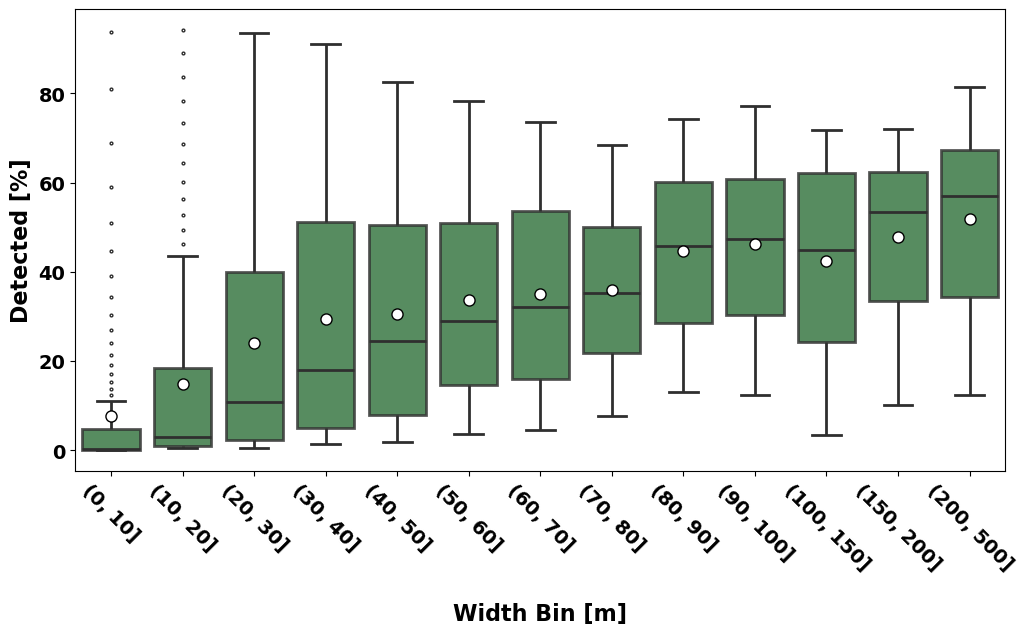

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='Bin', y='coverage',
            data=reach_thirty, order=ordered, color='#2D7038',
            saturation=1, showmeans=True,
            fliersize=2, linewidth=2,
            boxprops=dict(alpha=0.8),
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'k',
                       'markersize':'8'})

plt.xticks(fontsize=14, fontweight='semibold', rotation=-45)
plt.yticks(fontsize=14, fontweight='semibold',)

plt.xlabel('Width Bin [m]', fontsize=16,
           fontweight='bold', labelpad=20)
plt.ylabel('Detected [%]', fontsize=16,
           fontweight='bold')

# plt.savefig(fname=save_path + 'thiirty.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Detected [%]')

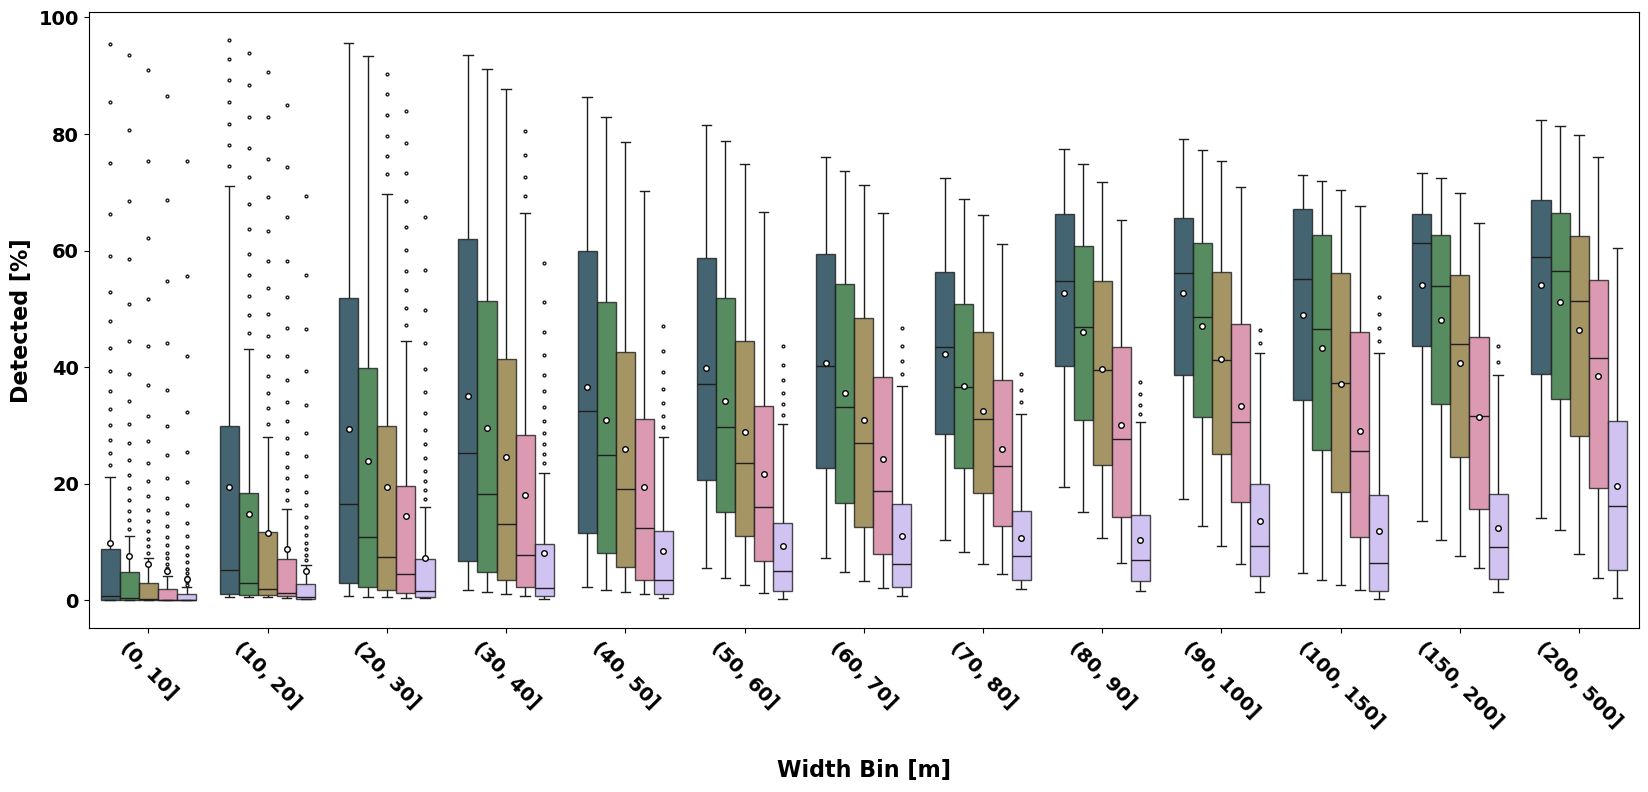

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x='Bin', y='coverage', hue='threshold',
            data=reaches_subset, order=ordered, palette=new_cmap,
            saturation=1, showmeans=True,
            fliersize=2, legend=False,
            boxprops=dict(alpha=0.8),
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'k',
                       'markersize':'4'})

plt.xticks(fontsize=14, fontweight='semibold', rotation=-45)
plt.yticks(fontsize=14, fontweight='semibold',)

plt.xlabel('Width Bin [m]', fontsize=16,
           fontweight='bold', labelpad=20)
plt.ylabel('Detected [%]', fontsize=16,
           fontweight='bold')

# plt.legend(title='Threshold [%]', #loc='upper right',
#            title_fontproperties={'weight': 'bold',
#                                  'size': 14},
#            prop={'weight': 'semibold',
#                  'size': 12})

# plt.savefig(fname=save_path + 'all.png', dpi=300, bbox_inches='tight')

### For Later

In [ ]:
# Group by the 'Bin' column and compute the weighted mean for each group
def weighted_mean(group):
    return (group['count'] * group['mean']).sum() / group['count'].sum()

# Apply the weighted mean function to each group
weighted_means = nodes_desc.groupby('Bin').apply(weighted_mean).reset_index(name='Weighted Mean')

In [ ]:
weighted_means

In [ ]:
# Group by the 'Bin' column
def weighted_std(group, weighted_mean):
    # Compute the weighted variance
    weighted_variance = ((group['count'] * ((group['mean'] - weighted_mean)**2 + group['std']**2)).sum()) / group['count'].sum()
    return weighted_variance**0.5

# Compute the weighted mean first
weighted_mean = (nodes_desc['count' ] * nodes_desc['mean']).sum() / nodes_desc['count'].sum()

# Apply the weighted std function to each group
weighted_stds = nodes_desc.groupby('Bin').apply(weighted_std, weighted_mean=weighted_mean).reset_index(name='Weighted Std')

In [ ]:
weighted_stds

In [ ]:
# Remove rows where the mean or standard deviation is NaN (e.g., row with index 15)
df = df.dropna(subset=['Mean', 'Std'])

# Group by the 'Bin' column
def weighted_std(group, weighted_mean):
    # Compute the weighted variance
    weighted_variance = ((group['Count'] * ((group['Mean'] - weighted_mean)**2 + group['Std']**2)).sum()) / group['Count'].sum())
    return weighted_variance**0.5

# Compute the weighted mean first
weighted_mean = (df['Count'] * df['Mean']).sum() / df['Count'].sum()

# Compute the weighted standard deviation first
weighted_stds = df.groupby('Bin').apply(weighted_std, weighted_mean=weighted_mean).reset_index(name='Weighted Std')

# Calculate the weighted standard error for each bin (Std / sqrt(Count))
weighted_stds['Weighted Std Error'] = weighted_stds['Weighted Std'] / np.sqrt(df.groupby('Bin')['Count'].sum().values)

# Print the results
print(weighted_stds)

In [ ]:
# nodes_desc[nodes_desc['Bin'] == '(100, 150]']

In [ ]:
# # Make nodes dataframe
# d = []
# for file in nodes_quant:
#     data = pd.read_csv(os.path.join(data_path, file))
#     d.append(data)
# nodes_quant = pd.concat(d, axis=0, ignore_index=True)#.rename(columns={'Unnamed: 0': 'stat'})

In [ ]:
# nodes_quant = nodes_quant[nodes_quant['with_zero'] == 1]

In [ ]:
# nodes_quant_binned = nodes_quant.groupby(['Bin', 'quantile']).mean().reset_index().drop(columns=['Unnamed: 0', 'with_zero'])

In [ ]:
# nodes_quant_binned

In [ ]:
# nodes_quant_binned[nodes_quant_binned['Bin'] == '(0, 10]']#.coverage.to_list()

In [ ]:
# Example: two groups of coverage data for two rivers
# Coverage values for River 1 and River 2 (from the data you provided)
river1_coverage = [0.0, 0.000356, 0.00166, 0.0042, 0.00691, 0.00935, 0.01078, 0.01217, 0.01308, 0.01471]  # And more...
river2_coverage = [0.0, 0.00205, 0.00407, 0.00496, 0.00627, 0.00766, 0.01038, 0.01121, 0.0121, 0.01261]  # And more...

# Combine these two rivers' data into a list of groups
data = [river1_coverage, river2_coverage]

In [ ]:
# Example: two groups of coverage data for two rivers
# Coverage values for River 1 and River 2 (from the data you provided)
river1_coverage = [0.0, 0.000356, 0.00166, 0.0042, 0.00691, 0.00935, 0.01078, 0.01217, 0.01308, 0.01471]  # And more...
river2_coverage = [0.0, 0.00205, 0.00407, 0.00496, 0.00627, 0.00766, 0.01038, 0.01121, 0.0121, 0.01261]  # And more...

# Combine these two rivers' data into a list of groups
data = [river1_coverage, river2_coverage]

# Create a boxplot
plt.boxplot(data, tick_labels=['River 1', 'River 2'])

# Set titles and labels
plt.title('Coverage Comparison between Rivers')
plt.ylabel('Coverage Value')

# Show plot
plt.show()

In [ ]:
# node_w_zero = node[node['with_zero'] == 1]

In [ ]:
# node_w_zero

In [ ]:
# node_mean = node[node['stat'] == 'mean'].drop(columns='stat').mean()

In [ ]:
# node_mean = pd.DataFrame(node_mean, columns=['Pseudo-nodes'])